In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)
warnings.filterwarnings("ignore")

In [128]:
df = pd.read_csv('social_marketing.csv')
df = df.rename(columns = {'Unnamed: 0': 'user_id'})
df['uncategorized'] = df['uncategorized'] + df['chatter']
df = df.drop(columns = ['chatter'])
df = df.drop(columns = ['user_id', 'uncategorized','adult','spam'])

#### EDA

In [129]:
df.iloc[0]

current_events       0
travel               2
photo_sharing        2
tv_film              1
sports_fandom        1
politics             0
food                 4
family               1
home_and_garden      2
music                0
news                 0
online_gaming        0
shopping             1
health_nutrition    17
college_uni          0
sports_playing       2
cooking              5
eco                  1
computers            1
business             0
outdoors             2
crafts               1
automotive           0
art                  0
religion             1
beauty               0
parenting            1
dating               1
school               0
personal_fitness    11
fashion              0
small_business       0
Name: 0, dtype: int64

In [130]:
df.shape

(7882, 32)

In [131]:
df.describe()

,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,music,news,online_gaming,shopping,health_nutrition,college_uni,sports_playing,cooking,eco,computers,business,outdoors,crafts,automotive,art,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business
count,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,1.526262,1.585004,2.696777,1.070287,1.594012,1.788632,1.397488,0.863867,0.520680,0.679269,1.205532,1.208830,1.389368,2.567242,1.549480,0.639178,1.998224,0.512307,0.649074,0.423243,0.782669,0.515859,0.829866,0.724816,1.095407,0.705151,0.921340,0.710860,0.767699,1.462065,0.996574,0.336336
std,1.268890,2.285530,2.731510,1.658783,2.160917,3.031113,1.775557,1.132562,0.736691,1.030015,2.100780,2.687465,1.808846,4.496144,2.897154,0.975517,3.429941,0.769725,1.179453,0.692379,1.209483,0.816848,1.366151,1.629576,1.914829,1.327903,1.515359,1.782347,1.188259,2.405244,1.828412,0.618147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,8.000000,26.000000,21.000000,17.000000,20.000000,37.000000,16.000000,10.000000,5.000000,13.000000,20.000000,27.000000,12.000000,41.000000,30.000000,8.000000,33.000000,6.000000,16.000000,6.000000,12.000000,7.000000,13.000000,18.000000,20.000000,14.000000,14.000000,24.000000,11.000000,19.000000,18.000000,6.000000


In [132]:
df.columns

Index(['current_events', 'travel', 'photo_sharing', 'tv_film', 'sports_fandom',
       'politics', 'food', 'family', 'home_and_garden', 'music', 'news',
       'online_gaming', 'shopping', 'health_nutrition', 'college_uni',
       'sports_playing', 'cooking', 'eco', 'computers', 'business', 'outdoors',
       'crafts', 'automotive', 'art', 'religion', 'beauty', 'parenting',
       'dating', 'school', 'personal_fitness', 'fashion', 'small_business'],
      dtype='object')

In [133]:
df_sum = pd.DataFrame(df.sum(), columns = ['sum'])

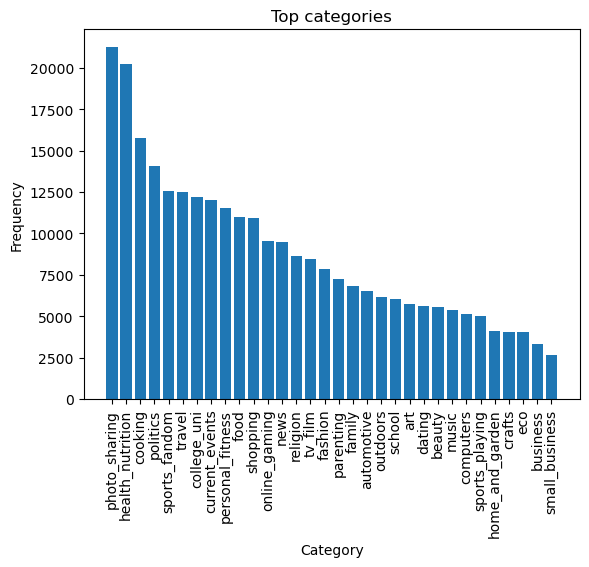

In [134]:
df_sum = df_sum.sort_values(by = 'sum', ascending = False)

# Create a bar plot
plt.bar(df_sum.index, df_sum['sum'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top categories')
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [135]:
total_tweets = df_sum['sum'].sum()
df_sum['cum_sum'] = df_sum['sum'].cumsum()
df_sum['cum_perc'] = df_sum['cum_sum'] / total_tweets
df_sum

,sum,cum_sum,cum_perc
photo_sharing,21256,21256,0.075512
health_nutrition,20235,41491,0.147396
cooking,15750,57241,0.203348
politics,14098,71339,0.253431
sports_fandom,12564,83903,0.298064
travel,12493,96396,0.342445
college_uni,12213,108609,0.385832
current_events,12030,120639,0.428568
personal_fitness,11524,132163,0.469507
food,11015,143178,0.508638


### Category distribution

- As we can see in the two charts above, the 50% of the tweets are distributed in the top 30% of the categories, we can see that there are not a perfect Paretto in the data distribution

## Clustering

Text(0.5, 1.0, 'Elbow Method')

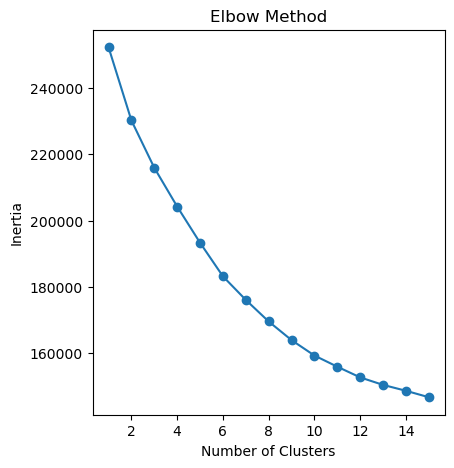

In [88]:
# Standardize the data (recommended for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Determine the optimal number of clusters using the elbow method
inertia_values = []
silhouette_scores = []

max_clusters = 15
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)
    if n_clusters > 1:
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

Text(0.5, 1.0, 'Silhouette Method')

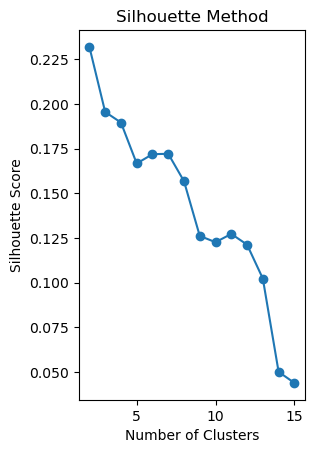

In [89]:
# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

### Number of clusters selection

In order to select the optimal number of clusters, we used two methodologies, the first one is the Elbow Method, which gives us a sense of the range where we should decide the number of clusters. After using the Silhouette Method, we did a trade off on how many clusters should we use without lossing the interpretability and not being too few clusters. And then we selected 8 clusters.

In [140]:
# Standardize the data (optional but recommended for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Choose the number of clusters
num_clusters = 8

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the cluster assignments
print(df['Cluster'].value_counts())

1    3686
5     921
7     834
0     706
4     550
6     407
2     396
3     382
Name: Cluster, dtype: int64


In [141]:
predictors = ['photo_sharing', 'health_nutrition', 'cooking',
       'politics', 'sports_fandom']

photo_sharing 



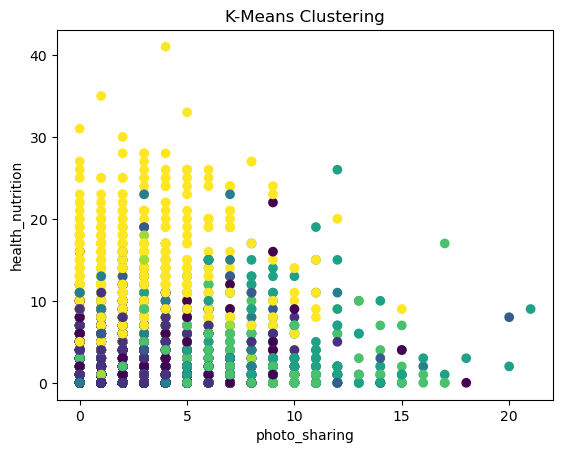

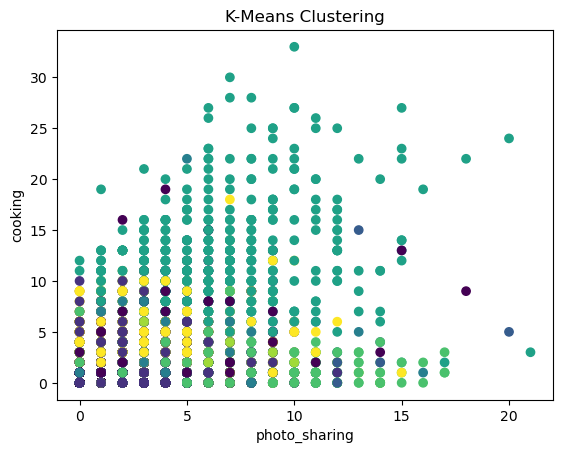

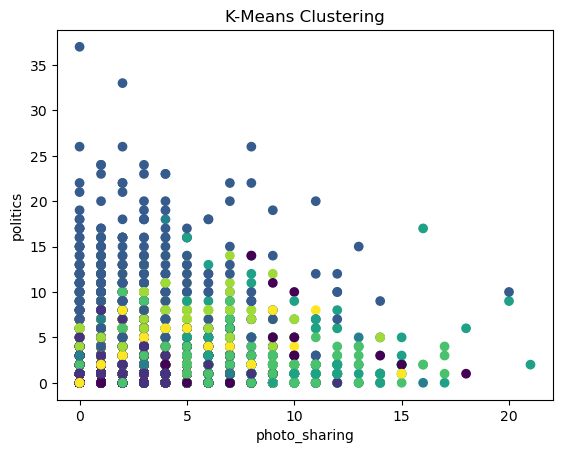

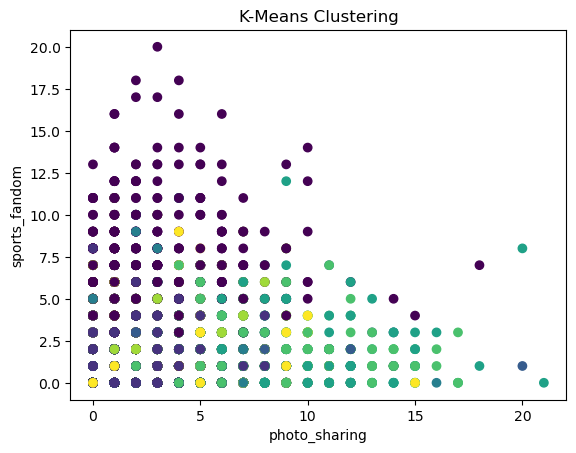

health_nutrition 



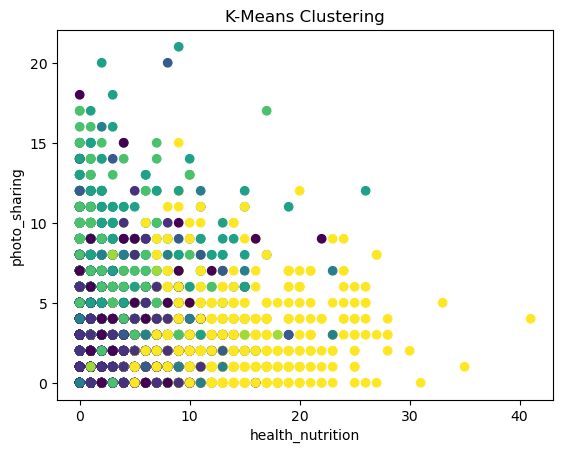

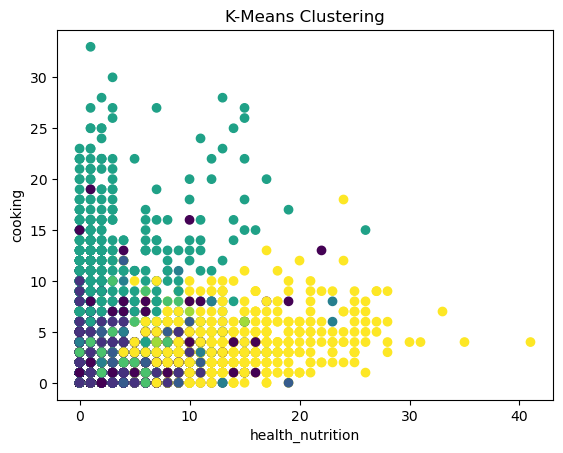

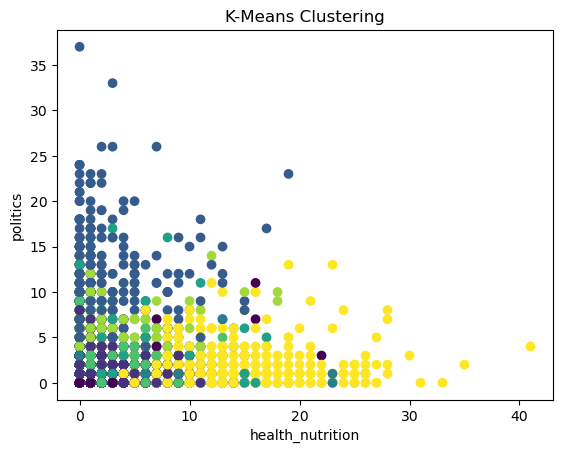

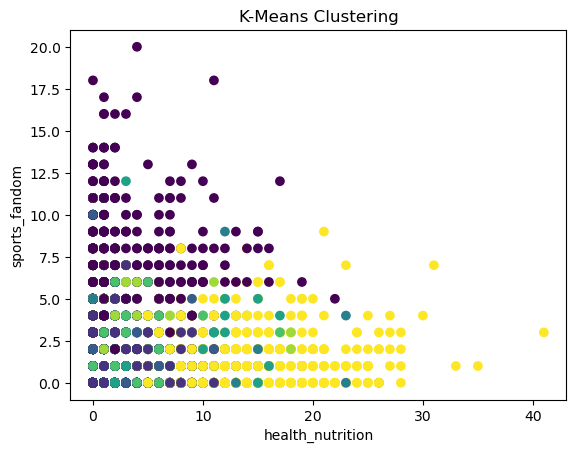

cooking 



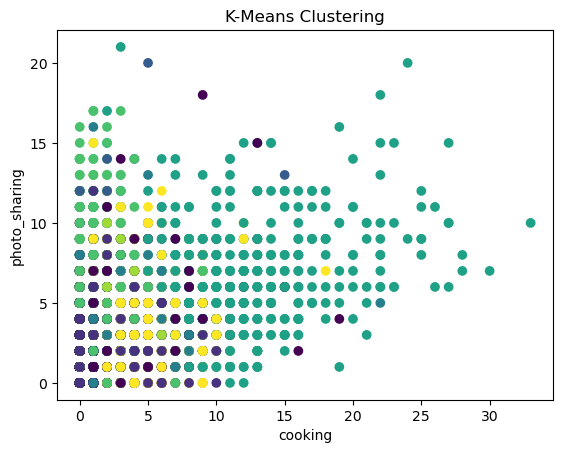

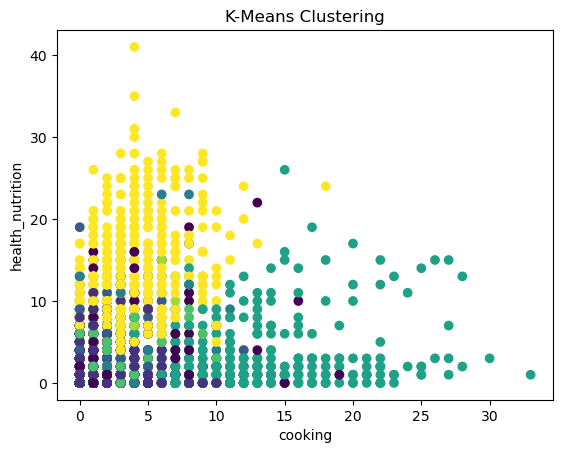

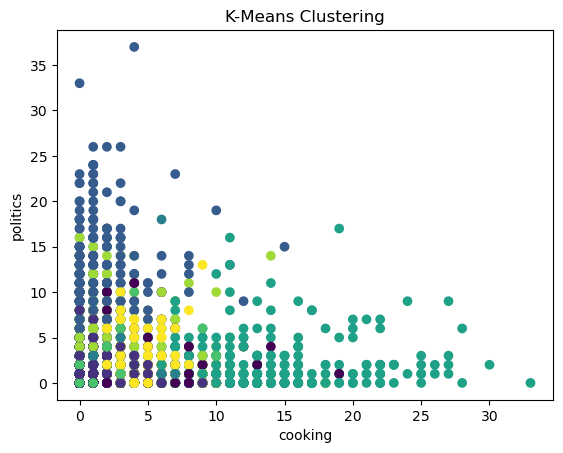

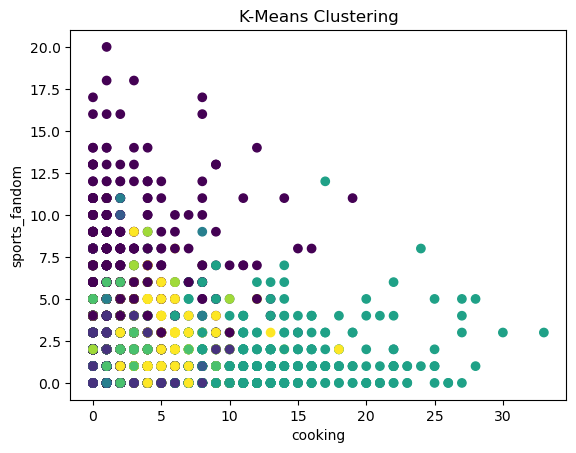

politics 



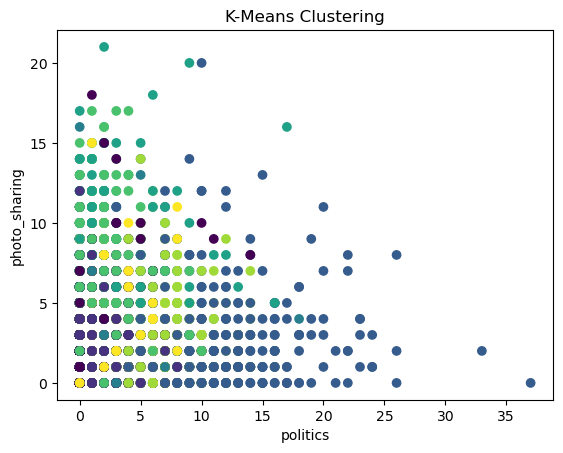

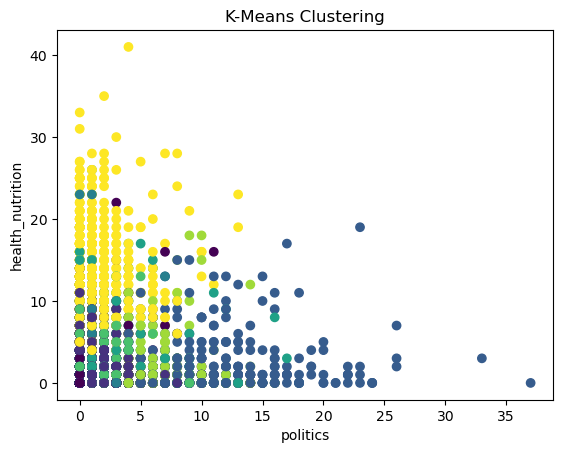

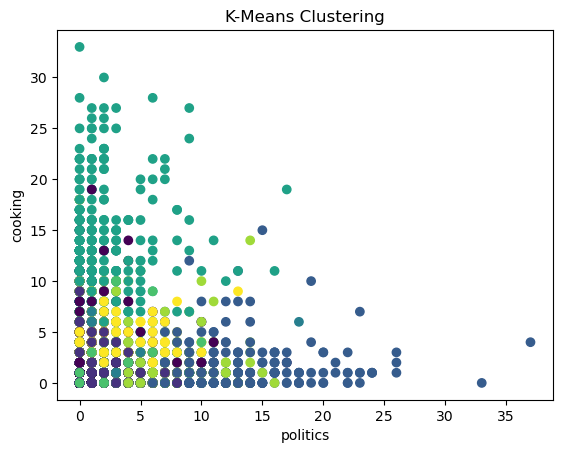

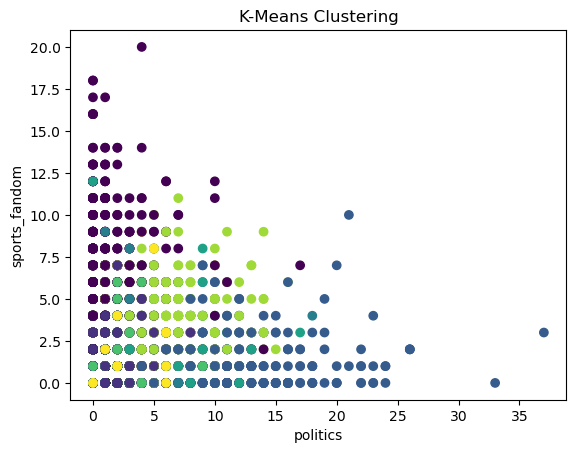

sports_fandom 



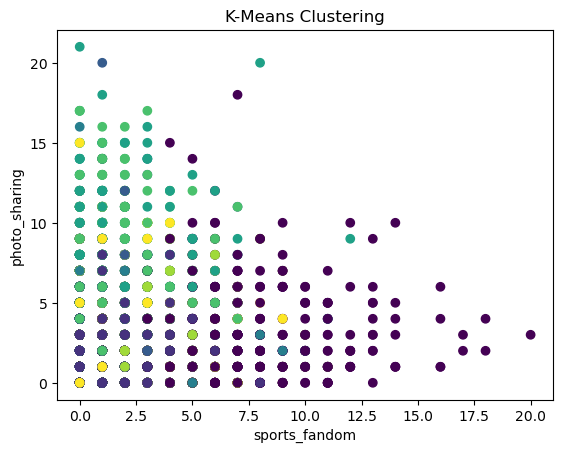

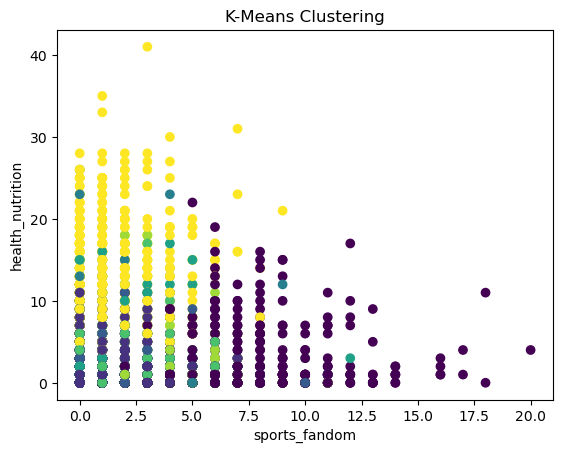

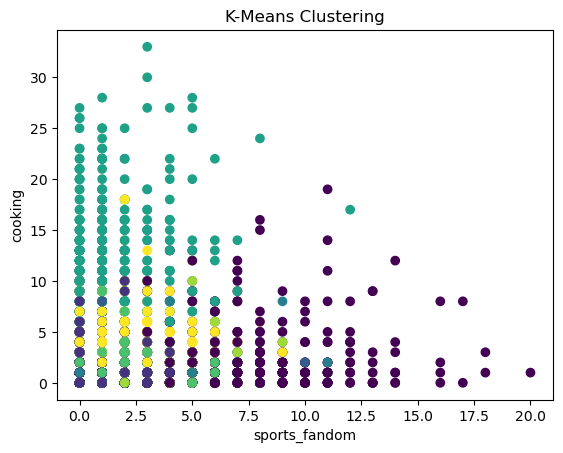

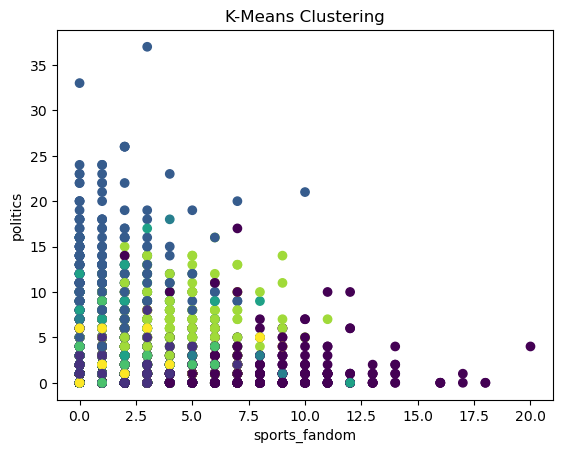

In [142]:
for c in predictors:
    print(c , '\n')
    
    for j in predictors:
        if c != j:
            plt.scatter(df[c], df[j], c=df['Cluster'])
            plt.xlabel(c)
            plt.ylabel(j)
            plt.title('K-Means Clustering')
            plt.show()

### 2-pair scatter plots

With the scatter plots above, we can start seeing some tendencies on the clusters that we will develop in the following analysis

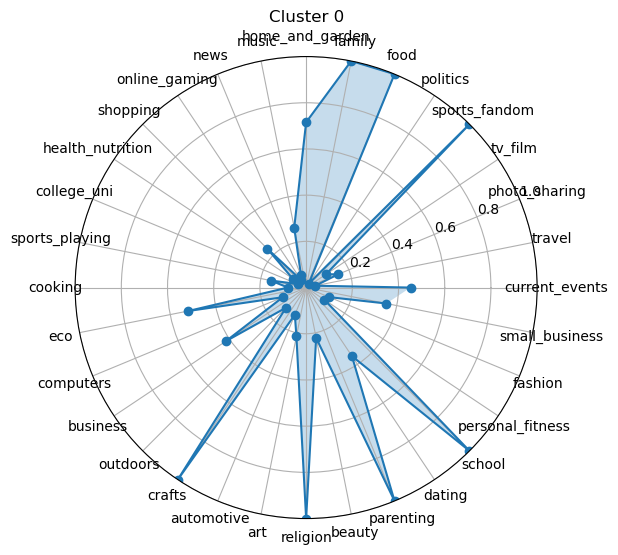

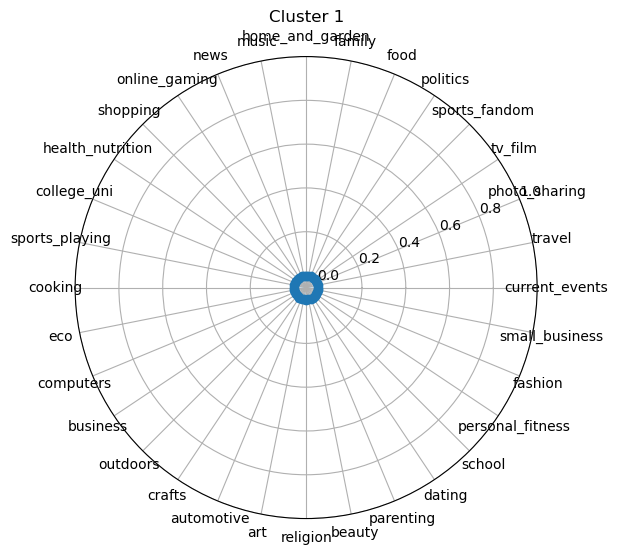

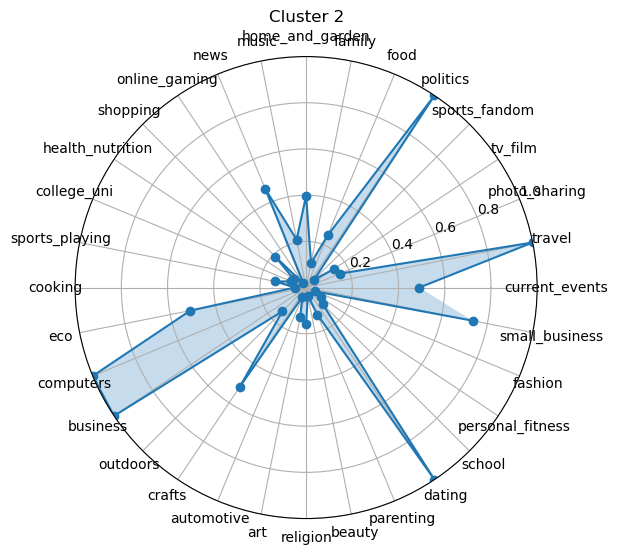

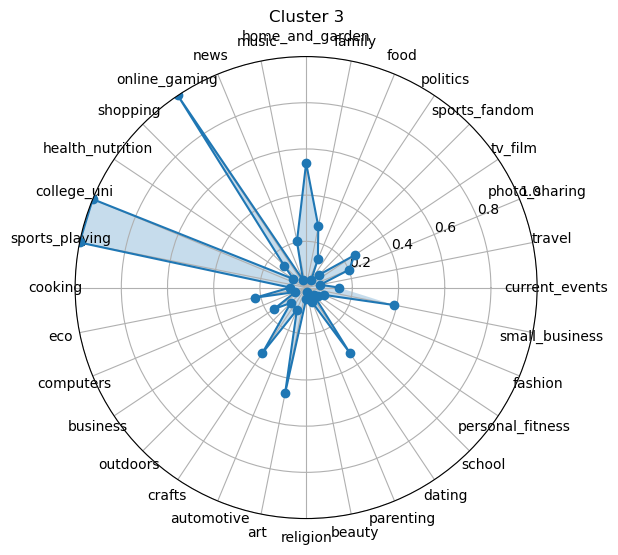

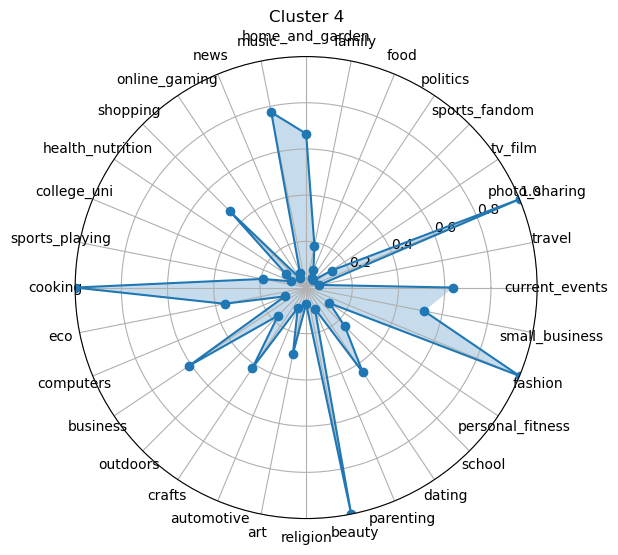

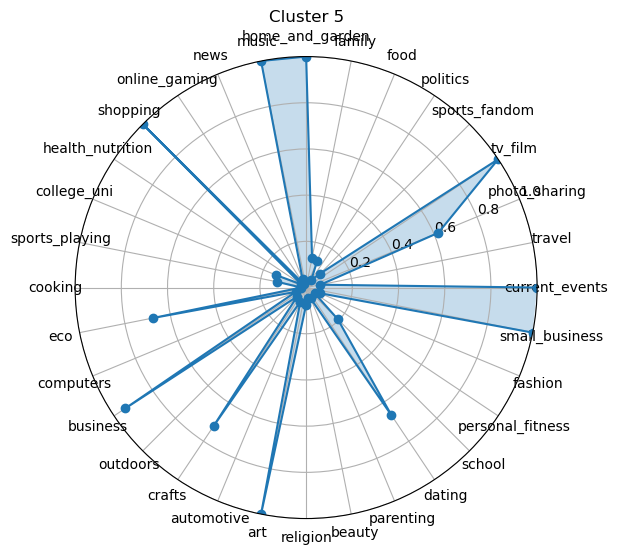

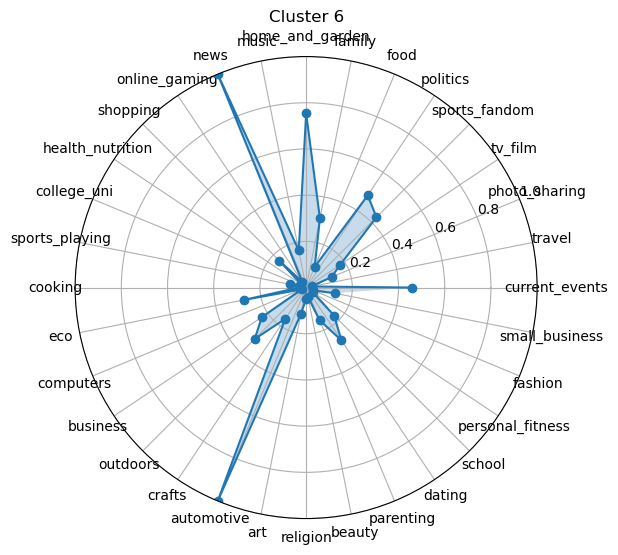

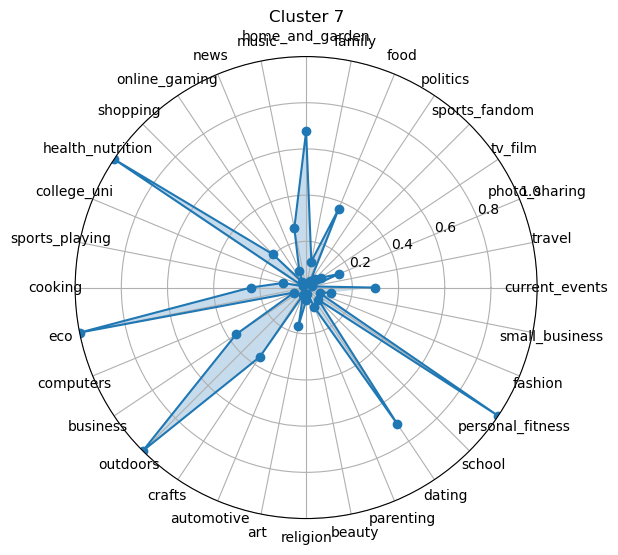

In [143]:
# Calculate mean values of each variable within each cluster
cluster_means = df.groupby('Cluster').mean()

# Normalize the values within each cluster to [0, 1]
normalized_cluster_means = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Plot radar plots for each cluster
num_clusters = len(normalized_cluster_means)
variables = df.columns[:-1]  # Exclude 'Cluster' column
angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False)

common_max = normalized_cluster_means.max().max()

for cluster_num, cluster_data in normalized_cluster_means.iterrows():
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
    ax.fill(angles, cluster_data.values, alpha=0.25)
    ax.plot(angles, cluster_data.values, marker='o')
    ax.set_xticks(angles)
    ax.set_xticklabels(variables)
    ax.set_rmax(common_max)
    ax.set_title(f'Cluster {cluster_num}')
    plt.show()

In [106]:
cluster_means

,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,music,news,online_gaming,shopping,health_nutrition,college_uni,sports_playing,cooking,eco,computers,business,outdoors,crafts,automotive,art,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.413428,1.045701,2.281979,0.704358,0.962073,0.994346,0.731920,0.576678,0.424735,0.495642,0.667845,0.593168,1.259835,1.110012,0.832038,0.412014,0.859600,0.375736,0.376914,0.314488,0.403298,0.326737,0.589870,0.338516,0.507420,0.339458,0.460306,0.551001,0.464782,0.665253,0.503416,0.243816
1,1.538813,1.227169,2.684932,0.832192,1.157534,1.272831,2.144977,0.784247,0.636986,0.692922,1.102740,0.885845,1.454338,12.071918,0.947489,0.622146,3.363014,0.920091,0.560502,0.464612,2.762557,0.554795,0.657534,0.605023,0.770548,0.442922,0.770548,1.055936,0.584475,6.449772,0.840183,0.269406
2,1.657817,5.635693,2.566372,1.035398,1.992625,9.001475,1.433628,0.921829,0.607670,0.622419,5.275811,0.915929,1.386431,1.641593,1.374631,0.632743,1.292035,0.604720,2.510324,0.659292,0.914454,0.600295,2.359882,0.551622,1.004425,0.477876,0.952802,1.067847,0.727139,1.008850,0.675516,0.471976
3,1.949309,2.048387,2.760369,5.617512,1.364055,1.417051,1.548387,0.723502,0.741935,1.806452,1.207373,0.725806,1.741935,1.698157,2.702765,0.741935,1.389401,0.615207,0.437788,0.730415,0.647465,1.092166,0.566820,4.723502,1.115207,0.691244,0.624424,0.631336,0.758065,1.059908,0.928571,0.852535
4,1.652646,1.316147,2.635007,0.902307,5.967436,1.173677,4.599729,2.514247,0.633650,0.712347,1.029851,1.027137,1.496608,1.852103,1.173677,0.731343,1.603799,0.667571,0.739484,0.503392,0.690638,1.073270,1.066486,0.687924,5.318860,1.109905,4.096336,0.792402,2.728630,1.175034,1.020353,0.390773
5,1.443850,1.417112,2.839572,1.211230,1.302139,1.211230,1.203209,1.072193,0.580214,0.668449,0.751337,10.518717,1.280749,1.668449,10.868984,2.657754,1.534759,0.470588,0.529412,0.355615,0.590909,0.545455,0.914439,1.139037,0.711230,0.403743,0.687166,0.748663,0.534759,0.973262,0.903743,0.419786
6,1.773234,1.429368,6.087361,0.853160,1.185874,1.349442,1.013011,0.894052,0.604089,1.230483,1.040892,1.128253,1.953532,2.061338,1.516729,0.855019,11.003717,0.542751,0.724907,0.605948,0.754647,0.589219,0.905204,0.723048,0.843866,3.970260,0.817844,0.886617,0.990706,1.256506,5.633829,0.455390


### Clusters

After doing the Cluster analysis, we can see clear groups into the dataset.

0. 

Religion, parenting, food, family

1.
Average group: Group that doesn't have remarkable interests

2.
Computers businesses travel, dating

3.
Sports playing, college uni, gaming

4.
Cooking Fashion, music, photo sharing

5.
Music, home and garding, events, art

6.
Automotive, news

7.
Outdors, ecology, personal fitnes, health and nutrition


It is interesting to see how there are groups like the 4 which interest are clear related eachother. We can also see groups where different people can fit like the 6 one with automotivation and news as the most interest tweets. Group like number 3 is also clear group of university students. 

With this information, we can suggest to NutrientH20 to create different content to each group in order to be more effective giving it's followers the content that they want to see